<a href="https://colab.research.google.com/github/kimheeseo/python/blob/main/cha6_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**6. 어떤 무선 청소기가 인기가 좋을까?**

**파이썬 requests 모듈을 이용하여 웹 페이지 긁어오기: https://www.youtube.com/watch?v=94PJY-ORQrs**

**2024.08.05: 무선청소기 -> 2024.08.06: 전화기**

**데이터 수집**

In [104]:
# 검색 결과 웹 페이지의 URL: https://prod.danawa.com/list/?cate=102207&shortcutKeyword=무선청소
# selenium으로 크롬 브라우저를 생성하고 '무선 청소기'에 대한 다나와 검색 결과 페이지 URL로 접속

# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Selenium 설치 & 내 구글 드라이브에 chromedriver 설치**

In [105]:
!pip install selenium
!apt-get update

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Ign:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:5 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:11 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [106]:
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver '/content/drive/MyDrive/Colab Notebooks' #
!pip install chromedriver-autoinstaller

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
chromium-chromedriver is already the newest version (1:85.0.4183.83-0ubuntu2.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [107]:
!python --version

import selenium
print(selenium.__version__)

Python 3.10.12
4.31.1


**라이브러리 임포트**

In [108]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import sys
from selenium.webdriver.common.keys import Keys
import urllib.request
import os
from urllib.request import urlretrieve

import time
import pandas as pd
import chromedriver_autoinstaller  # setup chrome options

**chrome_options 설정**

In [109]:
chrome_path = "/content/drive/MyDrive/Colab Notebooks/chromedriver"

In [110]:
sys.path.insert(0,chrome_path)
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') # ensure GUI is off
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')  # set path to chromedriver as per your configuration
chrome_options.add_argument('lang=ko_KR') # 한국어

chromedriver_autoinstaller.install()  # set the target URL

In [111]:
driver = webdriver.Chrome(options=chrome_options)

In [112]:
url='https://search.danawa.com/dsearch.php?k1=%EC%A0%84%ED%99%94%EA%B8%B0&module=goods&act=dispMain'
driver.get(url)

**다나와 검색 웹 페이지에서 상품 정보 가져오기**

In [113]:
# 데이터를 수집하기에 앞서 다나와 상품 검색 페이지를 살펴보겠습니다.
# 상품 검색 결과가 여러 페이지에 걸쳐 있으며, 각 페이지에 동일한 형식으로 상품이 표시됩니다.

# 검색 결과의 1페이지에 나온 30개의 상품 정보를 수집.

**웹 페이지의 HTML 정보 가져오기**

In [114]:
from bs4 import BeautifulSoup
html=driver.page_source
soup=BeautifulSoup(html,'html.parser')

# 검색 결과의 1페이지를 구성하는 HTML 정보를 가져와 BeautifulSoup으로 읽습니다.

In [115]:
prod_items=soup.select('li.prod_item')
len(prod_items)

# <li class="prod_item prod_layer" id="productItem41827157>"

42

**1페이지에 대한 청소기 정보 가져오기**

In [116]:
# 현재 페이지에서 우리가 찾고자 하는 상품의 개수는 30개인데, 앞서 검색한 태그는
# 31개가 있는 것으로 나옵니다. 우리가 찾는 30개의 상품만 조회하도록 상위 태그 정보를 추가해서 검색.
prod_items=soup.select('ul.product_list > li.prod_item')
len(prod_items)

# <div class="main_prodlist main_prodlist_list>"
# <ul class="product_list">
# <li class="prod_item prod_layer" id="productItem41827157>"

42

In [117]:
prod_items=soup.select('div.main_prodlist > ul.product_list > li.prod_item')
len(prod_items)

42

In [118]:
print(prod_items[0])

# 1번째 상품의 정보가 들어 있는 것을 확인할 수 있습니다.
# 여러가지 상품 정보 중에서 우리가 수집하고자 하는 정보를 추출해보겠습니다.

<li class="prod_item" id="productItem4452759">
<input id="productItem_categoryInfo_4452759" type="hidden" value="생활가전_전화기/무전기"/>
<input id="min_price_4452759" type="hidden" value="125220"/>
<div class="prod_main_info">
<div class="thumb_image">
<a class="thumb_link click_log_product_standard_img_" href="https://prod.danawa.com/info/?pcode=4452759&amp;keyword=%EC%A0%84%ED%99%94%EA%B8%B0&amp;cate=102686" id="thumbLink_4452759" onmousedown="_trkEventLog('통합검색_상품블로그_유입');" target="_blank">
<img alt="C7201A" fetchpriority="high" onerror="this.onerror=null; this.src='//img.danawa.com/new/noData/img/noImg_160.gif';" src="//img.danawa.com/prod_img/500000/759/452/img/4452759_1.jpg?shrink=130:130&amp;_v=20230802102108"/>
</a>
<a class="btn_view_zoom" data-assemblygallerycategory="N" href="#" id="imageZoom_4452759" onclick="return false;">
<span class="ico i_zoom_vw"></span>이미지보기
											</a>
<input id="hidden_cate_sub_c1" type="hidden" value="72"/>
<input id="hidden_cate_sub_c2" type="hidden"

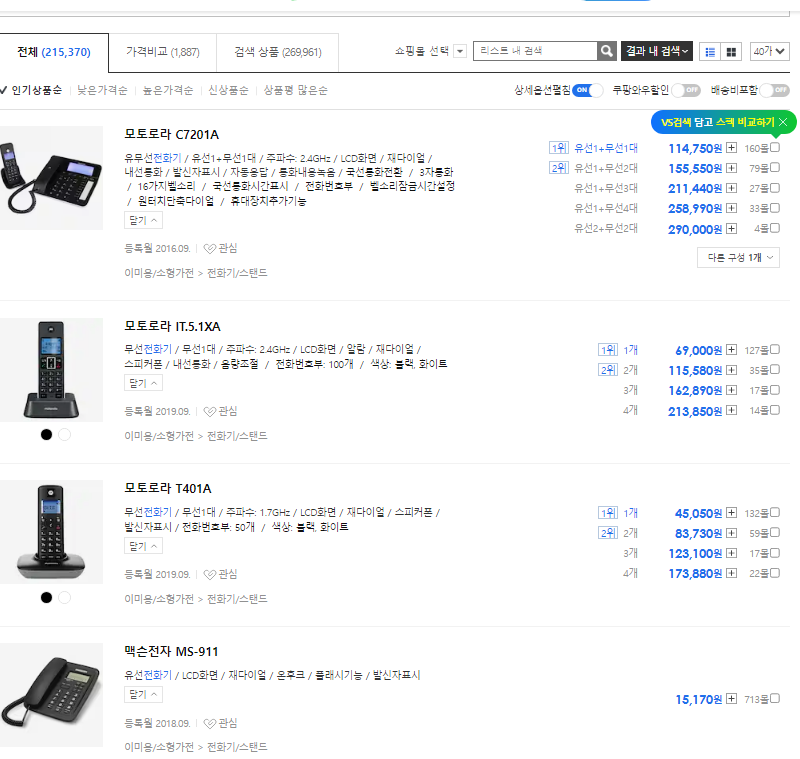

**상품명**

In [119]:
# 상품명 가져오기: <p class="prod_name"> dkfodml <a> 태그에 상품명 정보가 들어있기 때문에
# select('p.prod_name > a')[0].text 명령으로 상품명을 가져올 수 있습니다.

# <p class="prod_name"
# <strong class="pop_rank"> ... </strong>

# <a href="https://prod.danawa.com/info/?pcode=41827157&amp;cate=102207" target="_blank" onmousedown="_trkEventLog('15상품리스트_상품명')"
# name="productName"> LG전자 오브제컬렉션 코드제로 A9S AX958								</a>

title=prod_items[0].select('p.prod_name>a')[0].text.strip()
print(title)

title1=prod_items[1].select('p.prod_name>a')[0].text.strip()
print(title1)

모토로라 C7201A
모토로라 IT.5.1XA


**스펙 목록**

In [120]:
# 스펙 목록 가져오기
# <div class='spec_list'> 태그에 스펙 목록 정보가 들어있습니다.
spec_list=prod_items[0].select('div.spec_list')[0].text.strip()
print(spec_list)

spec_list1=prod_items[1].select('div.spec_list')[0].text.strip()
print(spec_list1)

유무선전화기/유선1+무선1대/주파수: 2.4GHz/LCD화면/재다이얼/내선통화/발신자표시/자동응답/통화내용녹음/국선통화전환 / 3자통화 / 16가지벨소리 / 국선통화시간표시 / 전화번호부 / 벨소리잠금시간설정 / 원터치단축다이얼 / 휴대장치추가기능
무선전화기/무선1대/주파수: 2.4GHz/LCD화면/알람/재다이얼/스피커폰/내선통화/음량조절 / 전화번호부: 100개 / 색상: 블랙, 화이트


**가격 정보 가져오기**

In [121]:
# 다나와에서는 동일한 모델이라도 옵션별로 다양한 가격이 조회됩니다.
# 이 가운데 1위 가격을 가져오기 위해 1위 옵션 태그의 위치를 살펴보겠습니다.

In [122]:
# 스펙 목록 가져오기
# <div class='spec_list'> 태그에 스펙 목록 정보가 들어있습니다.
spec_list=prod_items[0].select('div.prod_pricelist')[0].text
print(spec_list)






VS검색 담고 스펙 비교하기


닫기



													160몰
													
VS검색





125,220원

가격정보 더보기





1위 
																													유선1+무선1대																											






													79몰
													
VS검색





162,890원

가격정보 더보기





2위 
																													유선1+무선2대																											






													27몰
													
VS검색





211,440원

가격정보 더보기






																													유선1+무선3대																											






													33몰
													
VS검색





258,990원

가격정보 더보기






																													유선1+무선4대																											






													4몰
													
VS검색





290,000원

가격정보 더보기






																													유선2+무선2대																											






													4몰
													
VS검색





360,000원

가격정보 더보기






																													유선3+무선3대																											






다른 구성 1개





In [123]:
# 스펙 목록 가져오기
# <div class='spec_list'> 태그에 스펙 목록 정보가 들어있습니다.
spec_list=prod_items[0].select('p.price_sect>a')[0].text.strip()
print(spec_list)

spec_list1=prod_items[1].select('p.price_sect>a')[0].text.strip()
print(spec_list1)

125,220원
69,000원


In [124]:
# 반복문으로 검색 결과의 1페이지에 대한 상품 정보 추출
prod_data=[]
for prod_item in prod_items[1]:
  try: # 상품명 가져오기
    title=prod_item.select('p.prod_name>a')[0].text.strip()
  except:
    title=''

  try: # 스펙 목록 가져오기
    spec_list=prod_item.select('div.spec_list')[0].text.strip()
  except:
    sepc_list=''


  prod_data.append([title, spec_list])

print(len(prod_data))
print(prod_data)

7
[['', '125,220원'], ['', '125,220원'], ['', '125,220원'], ['', '125,220원'], ['', '125,220원'], ['모토로라 IT.5.1XA', '무선전화기/무선1대/주파수: 2.4GHz/LCD화면/알람/재다이얼/스피커폰/내선통화/음량조절 / 전화번호부: 100개 / 색상: 블랙, 화이트'], ['', '무선전화기/무선1대/주파수: 2.4GHz/LCD화면/알람/재다이얼/스피커폰/내선통화/음량조절 / 전화번호부: 100개 / 색상: 블랙, 화이트']]


In [125]:
prod_data=[]
for prod_item in prod_items[0:30]:
  try: # 상품명 가져오기
    title=prod_item.select('p.prod_name>a')[0].text.strip()
   # print('title값:',title)
  except:
    title=''

  try: # 스펙 목록 가져오기
    spec_list=prod_item.select('div.spec_list')[0].text.strip()
  except:
    spec_list=''

  try: # 가격 정보 가져오기
    price=prod_items[0].select('p.price_sect>a')[0].text.strip()
  except:
    price=0
  prod_data.append([title, spec_list, price])

print(len(prod_data))
print(prod_data)

# 검색 결과의 1페이지에 존재하는 총 30개의 결과가 잘 정리 된 것을 확인할 수 있습니다.
# 상품별로 수집할 정보(상품명, 스펙 목록, 가격)의 값이 없는 경우가 존재할 수도 있으므로 try/except 구문 활용.

30
[['모토로라 C7201A', '유무선전화기/유선1+무선1대/주파수: 2.4GHz/LCD화면/재다이얼/내선통화/발신자표시/자동응답/통화내용녹음/국선통화전환 / 3자통화 / 16가지벨소리 / 국선통화시간표시 / 전화번호부 / 벨소리잠금시간설정 / 원터치단축다이얼 / 휴대장치추가기능', '125,220원'], ['모토로라 IT.5.1XA', '무선전화기/무선1대/주파수: 2.4GHz/LCD화면/알람/재다이얼/스피커폰/내선통화/음량조절 / 전화번호부: 100개 / 색상: 블랙, 화이트', '125,220원'], ['모토로라 T401A', '무선전화기/무선1대/주파수: 1.7GHz/LCD화면/재다이얼/스피커폰/발신자표시/전화번호부: 50개 / 색상: 블랙, 화이트', '125,220원'], ['맥슨전자 MS-911', '유선전화기/LCD화면/재다이얼/온후크/플래시기능/발신자표시', '125,220원'], ['모토로라 C7201M + IT.5.1XAH', '유무선전화기/유선1+무선1대/LCD화면/재다이얼/보류/플래시기능/스피커폰/내선통화/발신자표시/자동응답/통화내용녹음/음성안내 / 16가지벨소리 / [IT.5.1XAH] 무선전화기 / 무선1대 / 주파수: 2.4GHz / LCD화면 / 알람 / 재다이얼 / 스피커폰 / 내선통화 / 증설용 / 음량조절 / 전화번호부: 100개', '125,220원'], ['', '', '125,220원'], ['맥슨전자 MDC-2025', '유무선전화기/주파수: 1.7GHz/LCD화면/알람/재다이얼/포즈/플래시기능/스피커폰/내선통화/발신자표시/크기(가로x세로x깊이): 110x175x110mm', '125,220원'], ['모토로라 SC250A', '유무선전화기/주파수: 2.4GHz/LCD화면/재다이얼/포즈/플래시기능/스피커폰/통화중대기/내선통화/발신자표시/자동응답/3자통화 / 휴대장치증설', '125,220원'], ['대명전자통신 강력벨 CID전화기 DM-805', '유선전화기/LCD화면/재다이얼/온후크/보류/플래시기능/발신자표시/

**상품 정보 태그에서 원하는 정보를 추출하는 함수**

In [126]:
def get_prod_items(prod_items):
  prod_data=[]

  for prod_item in prod_items[0:30]:
    try: # 상품명 가져오기
      title=prod_item.select('p.prod_name>a')[0].text.strip()
    # print('title값:',title)
    except:
      title=''

    try: # 스펙 목록 가져오기
      spec_list=prod_item.select('div.spec_list')[0].text.strip()
    except:
      spec_list=''

    try: # 가격 정보 가져오기
      price=prod_items[0].select('p.price_sect>a')[0].text.strip()
    except:
      price=0
    prod_data.append([title, spec_list, price])

  print(len(prod_data))
  print(prod_data)

  return prod_data
# 각 상품의 수집 항목(상품명, 스펙 목록, 가격 정보)을 추출한 결과 리스트인 prod_data가 반환됩니다.

In [127]:
prod_items=soup.select('div.main_prodlist>ul.product_list>li.prod_item')
prod_items[1:5]

[<li class="prod_item" id="productItem9537318">
 <input id="productItem_categoryInfo_9537318" type="hidden" value="생활가전_전화기/무전기"/>
 <input id="min_price_9537318" type="hidden" value="69000"/>
 <div class="prod_main_info">
 <div class="thumb_image">
 <a class="thumb_link click_log_product_standard_img_" href="https://prod.danawa.com/info/?pcode=9537318&amp;keyword=%EC%A0%84%ED%99%94%EA%B8%B0&amp;cate=102686" id="thumbLink_9537318" onmousedown="_trkEventLog('통합검색_상품블로그_유입');" target="_blank">
 <img alt="IT.5.1XA" fetchpriority="high" onerror="this.onerror=null; this.src='//img.danawa.com/new/noData/img/noImg_160.gif';" src="//img.danawa.com/prod_img/500000/318/537/img/9537318_1.jpg?shrink=130:130&amp;_v=20210218111830"/>
 </a>
 <a class="btn_view_zoom" data-assemblygallerycategory="N" href="#" id="imageZoom_9537318" onclick="return false;">
 <span class="ico i_zoom_vw"></span>이미지보기
 											</a>
 <div class="img_selector">
 <a class="sel_item" href="#" onclick="return false;" title="상

In [128]:
prod_data=get_prod_items(prod_items)
print(len(prod_data))

30
[['모토로라 C7201A', '유무선전화기/유선1+무선1대/주파수: 2.4GHz/LCD화면/재다이얼/내선통화/발신자표시/자동응답/통화내용녹음/국선통화전환 / 3자통화 / 16가지벨소리 / 국선통화시간표시 / 전화번호부 / 벨소리잠금시간설정 / 원터치단축다이얼 / 휴대장치추가기능', '125,220원'], ['모토로라 IT.5.1XA', '무선전화기/무선1대/주파수: 2.4GHz/LCD화면/알람/재다이얼/스피커폰/내선통화/음량조절 / 전화번호부: 100개 / 색상: 블랙, 화이트', '125,220원'], ['모토로라 T401A', '무선전화기/무선1대/주파수: 1.7GHz/LCD화면/재다이얼/스피커폰/발신자표시/전화번호부: 50개 / 색상: 블랙, 화이트', '125,220원'], ['맥슨전자 MS-911', '유선전화기/LCD화면/재다이얼/온후크/플래시기능/발신자표시', '125,220원'], ['모토로라 C7201M + IT.5.1XAH', '유무선전화기/유선1+무선1대/LCD화면/재다이얼/보류/플래시기능/스피커폰/내선통화/발신자표시/자동응답/통화내용녹음/음성안내 / 16가지벨소리 / [IT.5.1XAH] 무선전화기 / 무선1대 / 주파수: 2.4GHz / LCD화면 / 알람 / 재다이얼 / 스피커폰 / 내선통화 / 증설용 / 음량조절 / 전화번호부: 100개', '125,220원'], ['', '', '125,220원'], ['맥슨전자 MDC-2025', '유무선전화기/주파수: 1.7GHz/LCD화면/알람/재다이얼/포즈/플래시기능/스피커폰/내선통화/발신자표시/크기(가로x세로x깊이): 110x175x110mm', '125,220원'], ['모토로라 SC250A', '유무선전화기/주파수: 2.4GHz/LCD화면/재다이얼/포즈/플래시기능/스피커폰/통화중대기/내선통화/발신자표시/자동응답/3자통화 / 휴대장치증설', '125,220원'], ['대명전자통신 강력벨 CID전화기 DM-805', '유선전화기/LCD화면/재다이얼/온후크/보류/플래시기능/발신자표시/

**데이터 수집: 여러 페이지에 걸친 다나와 검색 페이지 크롤링**

In [129]:
# 이번 절에서는 이 함수와 반복문을 이용해 전체 페이지의 상품 정보 데이터를 수집.
# 다나와는 page가 url에 따라 달라지지 않게 바뀌어서 네이버 쇼핑으로 변경

# page1) pagingIndex=1: 페이지수
# https://search.shopping.naver.com/search/all?adQuery=무선청소기&origQuery=무선청소기&pagingIndex=1&pagingSize=40&productSet=total&query=무선청소기&sort=rel&timestamp=&viewType=list

# page2)
# https://search.shopping.naver.com/search/all?adQuery=무선청소기&origQuery=무선청소기&pagingIndex=2&pagingSize=40&productSet=total&query=무선청소기&sort=rel&timestamp=&viewType=list

# page3)
# https://search.shopping.naver.com/search/all?adQuery=무선청소&origQuery=무선청소기&pagingIndex=3&pagingSize=40&productSet=total&query=무선청소&sort=rel&timestamp=&viewType=list

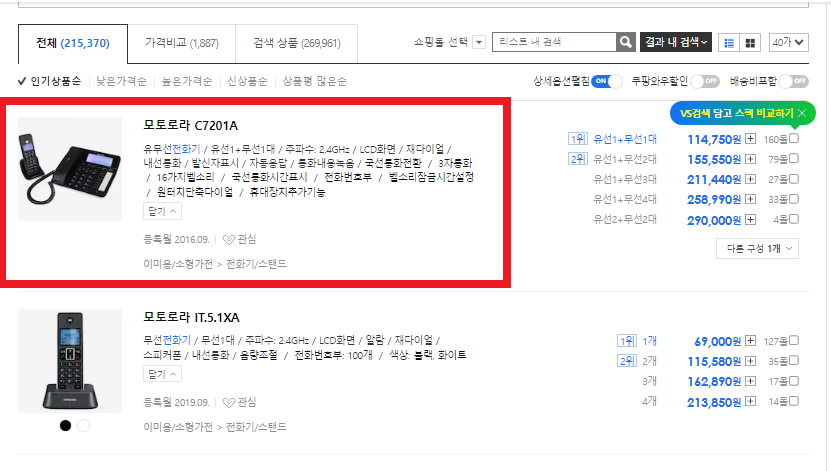

In [130]:
# 가장 중요한 값: query, page
# 이 두 파라미터 값을 달리해서 변경하면 원하는 검색 페이지를 요청할 수 있습니다.
# 검색어와 페이지 정보만 변경해서 다음과 같은 URL을 만들어서 웹 브라우저로 페이지를 열어서 호출할 수 있다면 여러 페이지를 가져오도록 처리할 수 있을 것입니다.

# ex) http://search.danawa.com/dsearch.php?query={검색어}&volumeType=allvs&page={페이지}&limit=30&sort=saveDESC&list=list&boost=true&addDelivery=N&tab=goods&tab=goods
# '무선청소기'로 검색한 결과 페이지를 for문을 통해 차례차례 변경하면서, 처리할 수 있다면 간간하게 여러 페이지를 크롤링할 수 있을 것입니다.

In [131]:
def get_search_page_url(page):
  return 'https://search.danawa.com/dsearch.php?query=%EC%A0%84%ED%99%94%EA%B8%B0&originalQuery=%EC%A0%84%ED%99%94%EA%B8%B0&previousKeyword=%EC%B2%AD%EC%86%8C%EA%B8%B0&checkedInfo=N&volumeType=allvs&page={}&limit=40&sort=saveDESC&list=list&boost=true&tab=goods&addDelivery=N&coupangMemberSort=N&simpleDescriptionOpen=Y&mode=simple&isInitTireSmartFinder=N&recommendedSort=N&defaultUICategoryCode=102686&defaultPhysicsCategoryCode=72%7C58596%7C58604%7C0&defaultVmTab=1887&defaultVaTab=269961&isZeroPrice=Y&quickProductYN=N&priceUnitSort=N&priceUnitSortOrder=A'.format(page)

page=1
url=get_search_page_url(page)
print(url)

https://search.danawa.com/dsearch.php?query=%EC%A0%84%ED%99%94%EA%B8%B0&originalQuery=%EC%A0%84%ED%99%94%EA%B8%B0&previousKeyword=%EC%B2%AD%EC%86%8C%EA%B8%B0&checkedInfo=N&volumeType=allvs&page=1&limit=40&sort=saveDESC&list=list&boost=true&tab=goods&addDelivery=N&coupangMemberSort=N&simpleDescriptionOpen=Y&mode=simple&isInitTireSmartFinder=N&recommendedSort=N&defaultUICategoryCode=102686&defaultPhysicsCategoryCode=72%7C58596%7C58604%7C0&defaultVmTab=1887&defaultVaTab=269961&isZeroPrice=Y&quickProductYN=N&priceUnitSort=N&priceUnitSortOrder=A


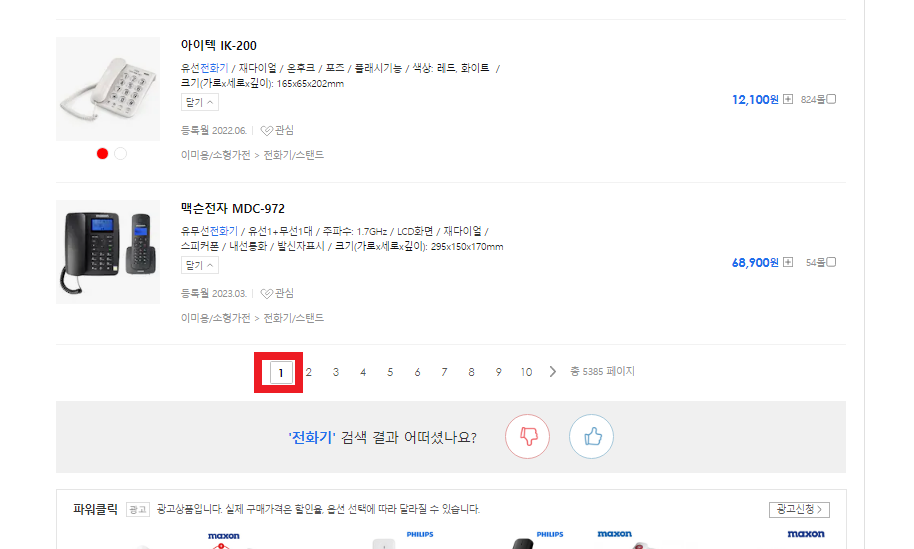

In [132]:
def get_search_page_url(page):
  return 'https://search.danawa.com/dsearch.php?query=%EC%A0%84%ED%99%94%EA%B8%B0&originalQuery=%EC%A0%84%ED%99%94%EA%B8%B0&previousKeyword=%EC%B2%AD%EC%86%8C%EA%B8%B0&checkedInfo=N&volumeType=allvs&page={}&limit=40&sort=saveDESC&list=list&boost=true&tab=goods&addDelivery=N&coupangMemberSort=N&simpleDescriptionOpen=Y&mode=simple&isInitTireSmartFinder=N&recommendedSort=N&defaultUICategoryCode=102686&defaultPhysicsCategoryCode=72%7C58596%7C58604%7C0&defaultVmTab=1887&defaultVaTab=269961&isZeroPrice=Y&quickProductYN=N&priceUnitSort=N&priceUnitSortOrder=A'.format(page)

page=2
url=get_search_page_url(page)
print(url)

# 여러 페이지를 크롤링할 때는 페이지 URL을 변경해 가며, 페이지별 정보를 수집하고 병합하는 과정을 반복하면 됩니다.

https://search.danawa.com/dsearch.php?query=%EC%A0%84%ED%99%94%EA%B8%B0&originalQuery=%EC%A0%84%ED%99%94%EA%B8%B0&previousKeyword=%EC%B2%AD%EC%86%8C%EA%B8%B0&checkedInfo=N&volumeType=allvs&page=2&limit=40&sort=saveDESC&list=list&boost=true&tab=goods&addDelivery=N&coupangMemberSort=N&simpleDescriptionOpen=Y&mode=simple&isInitTireSmartFinder=N&recommendedSort=N&defaultUICategoryCode=102686&defaultPhysicsCategoryCode=72%7C58596%7C58604%7C0&defaultVmTab=1887&defaultVaTab=269961&isZeroPrice=Y&quickProductYN=N&priceUnitSort=N&priceUnitSortOrder=A


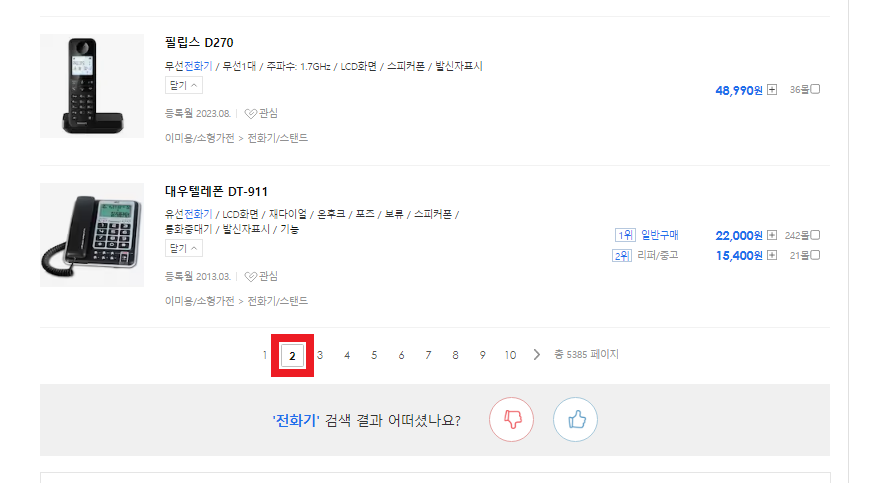

**진행표시줄 처리**

In [133]:
# 페이지별 URL을 이용해 반복문으로 전체 페이지의 상품 정보를 크롤링할 수 있습니다.
# 반복문을 실행하기에 앞서 tqdm 라이브러리를 이용해 현재 진행 상황을 표시하는 진행 표시줄을 만들어보겠습니다.
# tqdm 모듈을 이용하면 전체 과정 중 현재 진행 단계, 지금까지의 소요 시간, 1회 작업 시 소요시간, 예상 완료시간 등을 확인할 수 있슶니다.

! pip install tqdm
# 반복문 하나를 실행하는 것이 iteration이 하나 진행됐다고 하며, 현재 진행 상태를 확인할 수 있습니다.

In [134]:
import time
from tqdm import tqdm_notebook

total_page=10
for page in tqdm_notebook(range(1,total_page+1)):
  time.sleep(5) # 페이지가 로딩 완료되기 위한 시간을 5초로 준다.

<ipython-input-134-d73230a74bae>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for page in tqdm_notebook(range(1,total_page+1)):


  0%|          | 0/10 [00:00<?, ?it/s]

**여러 페이지에 걸친 상품 정보 수집**

In [135]:
url="https://search.danawa.com/dsearch.php?k1=%EC%A0%84%ED%99%94%EA%B8%B0&module=goods&act=dispMain"
driver.get(url)

html=driver.page_source
soup=BeautifulSoup(html, 'html.parser')

In [136]:
prod_items=soup.select('li.prod_item')
len(prod_items)

42

In [137]:
prod_items=soup.select('div.main_prodlist>ul.product_list>li.prod_item')
len(prod_items)

42

In [138]:
title=prod_items[0].select('p.prod_name > a')[0].text.strip()
print(title)

모토로라 C7201A


In [139]:
spec_list=prod_items[0].select('div.spec_list')[0].text.strip()
print(spec_list)

유무선전화기/유선1+무선1대/주파수: 2.4GHz/LCD화면/재다이얼/내선통화/발신자표시/자동응답/통화내용녹음/국선통화전환 / 3자통화 / 16가지벨소리 / 국선통화시간표시 / 전화번호부 / 벨소리잠금시간설정 / 원터치단축다이얼 / 휴대장치추가기능


In [140]:
price=prod_items[0].select('p.price_sect>a')[0].text.strip()
print(price)

125,220원


In [141]:
# 반복문으로 검색 결과의 1페이지에 대한 상품 정보 추출
prod_data=[]

for prod_item in prod_items[0:30]:
  try:
    title=prod_item.select('p.prod-name>a')[0].text.strip()
  except:
    title=''

  try:
    spec_list=prod_item.select('div.spec_list')[0].text.strip()
  except:
    spec_list=''

  try:
    price=prod_item.select('p.price_sect>a')[0].text.strip()
  except:
    price=0

  prod_data.append([title, spec_list, price])

print(len(prod_data))
print(prod_data)

30
[['', '유무선전화기/유선1+무선1대/주파수: 2.4GHz/LCD화면/재다이얼/내선통화/발신자표시/자동응답/통화내용녹음/국선통화전환 / 3자통화 / 16가지벨소리 / 국선통화시간표시 / 전화번호부 / 벨소리잠금시간설정 / 원터치단축다이얼 / 휴대장치추가기능', '125,220원'], ['', '무선전화기/무선1대/주파수: 2.4GHz/LCD화면/알람/재다이얼/스피커폰/내선통화/음량조절 / 전화번호부: 100개 / 색상: 블랙, 화이트', '69,000원'], ['', '무선전화기/무선1대/주파수: 1.7GHz/LCD화면/재다이얼/스피커폰/발신자표시/전화번호부: 50개 / 색상: 블랙, 화이트', '48,970원'], ['', '유선전화기/LCD화면/재다이얼/온후크/플래시기능/발신자표시', '15,170원'], ['', '유무선전화기/유선1+무선1대/LCD화면/재다이얼/보류/플래시기능/스피커폰/내선통화/발신자표시/자동응답/통화내용녹음/음성안내 / 16가지벨소리 / [IT.5.1XAH] 무선전화기 / 무선1대 / 주파수: 2.4GHz / LCD화면 / 알람 / 재다이얼 / 스피커폰 / 내선통화 / 증설용 / 음량조절 / 전화번호부: 100개', '108,560원'], ['', '', 0], ['', '유무선전화기/주파수: 1.7GHz/LCD화면/알람/재다이얼/포즈/플래시기능/스피커폰/내선통화/발신자표시/크기(가로x세로x깊이): 110x175x110mm', '35,780원'], ['', '유무선전화기/주파수: 2.4GHz/LCD화면/재다이얼/포즈/플래시기능/스피커폰/통화중대기/내선통화/발신자표시/자동응답/3자통화 / 휴대장치증설', '110,500원'], ['', '유선전화기/LCD화면/재다이얼/온후크/보류/플래시기능/발신자표시/단축다이얼 / 전화번호부/ 날짜 / 시간 / 벨선택 가능 / 크기(가로x세로x깊이): 200x155x137mm', '17,760원'], ['', '유무선전화기/유선1+무선1대/주파수: 1.7GHz/LCD화면/내선통화/발신자표시/무게

**상품 정보 태그에서 원하는 정보를 추출하는 함수**

In [142]:
def get_prod_items(prod_items):
# 반복문으로 검색 결과의 1페이지에 대한 상품 정보 추출
  prod_data=[]

  for prod_item in prod_items[0:30]:
    try:
      title=prod_item.select('p.prod_name>a')[0].text.strip()
    except:
      title=''

    try:
      spec_list=prod_item.select('div.spec_list')[0].text.strip()
    except:
      spec_list=''

    try:
      price=prod_item.select('p.price_sect>a')[0].text.strip()
    except:
      price=0

    prod_data.append([title, spec_list, price])

  print(len(prod_data))
  print(prod_data)
  return prod_data

In [143]:
prod_items=soup.select('div.main_prodlist >ul.product_list>li.prod_item')
prod_data=get_prod_items(prod_items)
print(len(prod_data))

30
[['모토로라 C7201A', '유무선전화기/유선1+무선1대/주파수: 2.4GHz/LCD화면/재다이얼/내선통화/발신자표시/자동응답/통화내용녹음/국선통화전환 / 3자통화 / 16가지벨소리 / 국선통화시간표시 / 전화번호부 / 벨소리잠금시간설정 / 원터치단축다이얼 / 휴대장치추가기능', '125,220원'], ['모토로라 IT.5.1XA', '무선전화기/무선1대/주파수: 2.4GHz/LCD화면/알람/재다이얼/스피커폰/내선통화/음량조절 / 전화번호부: 100개 / 색상: 블랙, 화이트', '69,000원'], ['모토로라 T401A', '무선전화기/무선1대/주파수: 1.7GHz/LCD화면/재다이얼/스피커폰/발신자표시/전화번호부: 50개 / 색상: 블랙, 화이트', '48,970원'], ['맥슨전자 MS-911', '유선전화기/LCD화면/재다이얼/온후크/플래시기능/발신자표시', '15,170원'], ['모토로라 C7201M + IT.5.1XAH', '유무선전화기/유선1+무선1대/LCD화면/재다이얼/보류/플래시기능/스피커폰/내선통화/발신자표시/자동응답/통화내용녹음/음성안내 / 16가지벨소리 / [IT.5.1XAH] 무선전화기 / 무선1대 / 주파수: 2.4GHz / LCD화면 / 알람 / 재다이얼 / 스피커폰 / 내선통화 / 증설용 / 음량조절 / 전화번호부: 100개', '108,560원'], ['', '', 0], ['맥슨전자 MDC-2025', '유무선전화기/주파수: 1.7GHz/LCD화면/알람/재다이얼/포즈/플래시기능/스피커폰/내선통화/발신자표시/크기(가로x세로x깊이): 110x175x110mm', '35,780원'], ['모토로라 SC250A', '유무선전화기/주파수: 2.4GHz/LCD화면/재다이얼/포즈/플래시기능/스피커폰/통화중대기/내선통화/발신자표시/자동응답/3자통화 / 휴대장치증설', '110,500원'], ['대명전자통신 강력벨 CID전화기 DM-805', '유선전화기/LCD화면/재다이얼/온후크/보류/플래시기능/발신자표시/단축다이얼 / 전화번호부

In [144]:
prod_items

[<li class="prod_item" id="productItem4452759">
 <input id="productItem_categoryInfo_4452759" type="hidden" value="생활가전_전화기/무전기"/>
 <input id="min_price_4452759" type="hidden" value="125220"/>
 <div class="prod_main_info">
 <div class="thumb_image">
 <a class="thumb_link click_log_product_standard_img_" href="https://prod.danawa.com/info/?pcode=4452759&amp;keyword=%EC%A0%84%ED%99%94%EA%B8%B0&amp;cate=102686" id="thumbLink_4452759" onmousedown="_trkEventLog('통합검색_상품블로그_유입');" target="_blank">
 <img alt="C7201A" fetchpriority="high" onerror="this.onerror=null; this.src='//img.danawa.com/new/noData/img/noImg_160.gif';" src="//img.danawa.com/prod_img/500000/759/452/img/4452759_1.jpg?shrink=130:130&amp;_v=20230802102108"/>
 </a>
 <a class="btn_view_zoom" data-assemblygallerycategory="N" href="#" id="imageZoom_4452759" onclick="return false;">
 <span class="ico i_zoom_vw"></span>이미지보기
 											</a>
 <input id="hidden_cate_sub_c1" type="hidden" value="72"/>
 <input id="hidden_cate_sub_c2" 

**URL 변화**

In [145]:
# https://search.danawa.com/dsearch.php?k1=%EC%A0%84%ED%99%94%EA%B8%B0&module=goods&act=dispMain

# 1페이지 진입 시 (최초 URL과 동일)
# https://search.danawa.com/dsearch.php?query=%EC%A0%84%ED%99%94%EA%B8%B0&originalQuery=%EC%A0%84%ED%99%94%EA%B8%B0&previousKeyword=%EC%B2%AD%EC%86%8C%EA%B8%B0&checkedInfo=N&volumeType=allvs&page=1&limit=40&sort=saveDESC&list=list&boost=true&tab=main&addDelivery=N&coupangMemberSort=N&simpleDescriptionOpen=Y&mode=simple&isInitTireSmartFinder=N&recommendedSort=N&defaultUICategoryCode=102686&defaultPhysicsCategoryCode=72%7C58596%7C58604%7C0&defaultVmTab=1887&defaultVaTab=269961&isZeroPrice=Y&quickProductYN=N&priceUnitSort=N&priceUnitSortOrder=A

# 2페이지 진입 시
# https://search.danawa.com/dsearch.php?query=%EC%A0%84%ED%99%94%EA%B8%B0&originalQuery=%EC%A0%84%ED%99%94%EA%B8%B0&previousKeyword=%EC%B2%AD%EC%86%8C%EA%B8%B0&checkedInfo=N&volumeType=allvs&page=2&limit=40&sort=saveDESC&list=list&boost=true&tab=goods&addDelivery=N&coupangMemberSort=N&simpleDescriptionOpen=Y&mode=simple&isInitTireSmartFinder=N&recommendedSort=N&defaultUICategoryCode=102686&defaultPhysicsCategoryCode=72%7C58596%7C58604%7C0&defaultVmTab=1887&defaultVaTab=269961&isZeroPrice=Y&quickProductYN=N&priceUnitSort=N&priceUnitSortOrder=A

In [146]:
from selenium import webdriver
import time
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
driver.implicitly_wait(3)
keyword='전화기'
total_page=10
prod_data_total=[]

In [147]:
def get_search_page_url(keyword, total_page):
  return 'https://search.danawa.com/dsearch.php?query={}&originalQuery={}&previousKeyword=%EC%B2%AD%EC%86%8C%EA%B8%B0&checkedInfo=N&volumeType=allvs&page={}&limit=40&sort=saveDESC&list=list&boost=true&tab=goods&addDelivery=N&coupangMemberSort=N&simpleDescriptionOpen=Y&mode=simple&isInitTireSmartFinder=N&recommendedSort=N&defaultUICategoryCode=102686&defaultPhysicsCategoryCode=72%7C58596%7C58604%7C0&defaultVmTab=1887&defaultVaTab=269961&isZeroPrice=Y&quickProductYN=N&priceUnitSort=N&priceUnitSortOrder=A'.format(keyword, keyword,page)

In [148]:
for page in tqdm_notebook(range(1,total_page+1)):
  url=get_search_page_url(keyword, page)
  driver.get(url)
  # 페이지가 로딩 완료되기 위한 시간으로 5초를 할당
  # 페이지 URL을 생성하는 함수를 이용해 특정 페이지로 이동합니다.
  time.sleep(5)

  # 현재 페이지의 HTML 정보 가져오기
  html=driver.page_source
  soup=BeautifulSoup(html, 'html.parser')

  # 상품 정보 추출
  prod_items=soup.select('div#productListArea > div.main_prodlist > ul.product_list > li.prod_item')
  prod_item_list=get_prod_items(prod_items)

  # 추출 데이터 저장
  prod_data_total=prod_data_total+prod_item_list

<ipython-input-148-842c2d23d80d>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for page in tqdm_notebook(range(1,total_page+1)):


  0%|          | 0/10 [00:00<?, ?it/s]

30
[['모토로라 C7201A', '유무선전화기/유선1+무선1대/주파수: 2.4GHz/LCD화면/재다이얼/내선통화/발신자표시/자동응답/통화내용녹음/국선통화전환 / 3자통화 / 16가지벨소리 / 국선통화시간표시 / 전화번호부 / 벨소리잠금시간설정 / 원터치단축다이얼 / 휴대장치추가기능', '125,220원'], ['모토로라 IT.5.1XA', '무선전화기/무선1대/주파수: 2.4GHz/LCD화면/알람/재다이얼/스피커폰/내선통화/음량조절 / 전화번호부: 100개 / 색상: 블랙, 화이트', '69,000원'], ['모토로라 T401A', '무선전화기/무선1대/주파수: 1.7GHz/LCD화면/재다이얼/스피커폰/발신자표시/전화번호부: 50개 / 색상: 블랙, 화이트', '48,970원'], ['맥슨전자 MS-911', '유선전화기/LCD화면/재다이얼/온후크/플래시기능/발신자표시', '15,170원'], ['모토로라 C7201M + IT.5.1XAH', '유무선전화기/유선1+무선1대/LCD화면/재다이얼/보류/플래시기능/스피커폰/내선통화/발신자표시/자동응답/통화내용녹음/음성안내 / 16가지벨소리 / [IT.5.1XAH] 무선전화기 / 무선1대 / 주파수: 2.4GHz / LCD화면 / 알람 / 재다이얼 / 스피커폰 / 내선통화 / 증설용 / 음량조절 / 전화번호부: 100개', '108,560원'], ['', '', 0], ['맥슨전자 MDC-2025', '유무선전화기/주파수: 1.7GHz/LCD화면/알람/재다이얼/포즈/플래시기능/스피커폰/내선통화/발신자표시/크기(가로x세로x깊이): 110x175x110mm', '35,780원'], ['모토로라 SC250A', '유무선전화기/주파수: 2.4GHz/LCD화면/재다이얼/포즈/플래시기능/스피커폰/통화중대기/내선통화/발신자표시/자동응답/3자통화 / 휴대장치증설', '110,500원'], ['대명전자통신 강력벨 CID전화기 DM-805', '유선전화기/LCD화면/재다이얼/온후크/보류/플래시기능/발신자표시/단축다이얼 / 전화번호부

In [149]:
prod_data_total

[['모토로라 C7201A',
  '유무선전화기/유선1+무선1대/주파수: 2.4GHz/LCD화면/재다이얼/내선통화/발신자표시/자동응답/통화내용녹음/국선통화전환 / 3자통화 / 16가지벨소리 / 국선통화시간표시 / 전화번호부 / 벨소리잠금시간설정 / 원터치단축다이얼 / 휴대장치추가기능',
  '125,220원'],
 ['모토로라 IT.5.1XA',
  '무선전화기/무선1대/주파수: 2.4GHz/LCD화면/알람/재다이얼/스피커폰/내선통화/음량조절 / 전화번호부: 100개 / 색상: 블랙, 화이트',
  '69,000원'],
 ['모토로라 T401A',
  '무선전화기/무선1대/주파수: 1.7GHz/LCD화면/재다이얼/스피커폰/발신자표시/전화번호부: 50개 / 색상: 블랙, 화이트',
  '48,970원'],
 ['맥슨전자 MS-911', '유선전화기/LCD화면/재다이얼/온후크/플래시기능/발신자표시', '15,170원'],
 ['모토로라 C7201M + IT.5.1XAH',
  '유무선전화기/유선1+무선1대/LCD화면/재다이얼/보류/플래시기능/스피커폰/내선통화/발신자표시/자동응답/통화내용녹음/음성안내 / 16가지벨소리 / [IT.5.1XAH] 무선전화기 / 무선1대 / 주파수: 2.4GHz / LCD화면 / 알람 / 재다이얼 / 스피커폰 / 내선통화 / 증설용 / 음량조절 / 전화번호부: 100개',
  '108,560원'],
 ['', '', 0],
 ['맥슨전자 MDC-2025',
  '유무선전화기/주파수: 1.7GHz/LCD화면/알람/재다이얼/포즈/플래시기능/스피커폰/내선통화/발신자표시/크기(가로x세로x깊이): 110x175x110mm',
  '35,780원'],
 ['모토로라 SC250A',
  '유무선전화기/주파수: 2.4GHz/LCD화면/재다이얼/포즈/플래시기능/스피커폰/통화중대기/내선통화/발신자표시/자동응답/3자통화 / 휴대장치증설',
  '110,500원'],
 ['대명전자통신 강력벨 CID전화기 DM-805',
  '유선전화기/LCD화면/재다이얼/온

**수집 데이터저장**

In [150]:
import pandas as pd
data=pd.DataFrame(prod_data_total)
data.columns=['상품명','스펙 목록','가격']
data.to_excel('danawa_crawling_result.xlsx',index=False)

**다나와 크롤링 데이터 전처리**

In [151]:
# 수집한 데이터를 분석에 용이하도록, 상품명 데이터에서 회사명과 제품명 분리
# 일반 문자열로 저장된 스펙 목록을 필요한 스펙으로 분류 및 단위 통합

**다나와 크롤링 데이터 불러오기**

In [152]:
import pandas as pd
data=pd.read_excel('/content/danawa_crawling_result.xlsx')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품명     280 non-null    object
 1   스펙 목록   280 non-null    object
 2   가격      300 non-null    object
dtypes: object(3)
memory usage: 7.2+ KB


,상품명,스펙 목록,가격
0,모토로라 C7201A,유무선전화기/유선1+무선1대/주파수: 2.4GHz/LCD화면/재다이얼/내선통화/발신...,"125,220원"
1,모토로라 IT.5.1XA,무선전화기/무선1대/주파수: 2.4GHz/LCD화면/알람/재다이얼/스피커폰/내선통화...,"69,000원"
2,모토로라 T401A,무선전화기/무선1대/주파수: 1.7GHz/LCD화면/재다이얼/스피커폰/발신자표시/전...,"48,970원"
3,맥슨전자 MS-911,유선전화기/LCD화면/재다이얼/온후크/플래시기능/발신자표시,"15,170원"
4,모토로라 C7201M + IT.5.1XAH,유무선전화기/유선1+무선1대/LCD화면/재다이얼/보류/플래시기능/스피커폰/내선통화/...,"108,560원"


In [153]:
data=data.dropna()

In [154]:
# 총 300개의 무선청소기 데이터를 가져왔음을 확인할 수 있고, 상품명, 스펙 목록은 문자열 타입(object)인데, 이는 보통 문자열 데이터일때 object 데이터 타입으로 표현.
# 가격은 숫자형 데이터 타입(int)으로 구성돼 있습니다.
# 가격은 모두 300개로서 모든 항목에 데이터가 잘 채워진 것을 확인할 수 있습니다.

**회사명, 모델명 정리**

In [155]:
data['상품명'][:10]

0                  모토로라 C7201A
1                모토로라 IT.5.1XA
2                   모토로라 T401A
3                  맥슨전자 MS-911
4      모토로라 C7201M + IT.5.1XAH
6                맥슨전자 MDC-2025
7                  모토로라 SC250A
8     대명전자통신 강력벨 CID전화기 DM-805
9                 맥슨전자 MDC-990
10                모임스톤 DP200-S
Name: 상품명, dtype: object

In [156]:
data['상품명'][130:145]

140               모토로라 C7201H
141            삼성전자 SMT-i6020
142            LG전자 LGIP-1150
143               모토로라 C7201R
144               모토로라 SC250R
145            뉴썬인더스트리 NS-905
146                  맥슨전자 M30
147             오빌텔레콤 OID-500
148           에릭슨 iPECS 1030i
149    POLYCOM 사운드스테이션-IP5000
150               맥슨전자 MS-109
151                  DY-21230
152    POLYCOM VVX400 인터넷 전화기
153             알티텔레콤 RT-1800
154           파나소닉 KX-TGC350B
Name: 상품명, dtype: object

In [157]:
data['상품명'][151]='DY DY-21230'

In [158]:
data['상품명'][151]

'DY DY-21230'

**회사명+모델명 분리**

In [159]:
company_list=[]
product_list=[]

i=0
for title in data['상품명']:
  print('i값:',i)
  title_info=title.split(' ')

  company_name=title_info[0]
  product_name=title_info[1]
  print('product_name값',product_name)

  company_list.append(company_name)
  product_list.append(product_name)
  i=i+1

i값: 0
product_name값 C7201A
i값: 1
product_name값 IT.5.1XA
i값: 2
product_name값 T401A
i값: 3
product_name값 MS-911
i값: 4
product_name값 C7201M
i값: 5
product_name값 MDC-2025
i값: 6
product_name값 SC250A
i값: 7
product_name값 강력벨
i값: 8
product_name값 MDC-990
i값: 9
product_name값 DP200-S
i값: 10
product_name값 OP-201
i값: 11
product_name값 CORD026
i값: 12
product_name값 WPL-5000
i값: 13
product_name값 GT-8126
i값: 14
product_name값 HP-210
i값: 15
product_name값 CT511RA
i값: 16
product_name값 C7201AH
i값: 17
product_name값 NS-900
i값: 18
product_name값 S3001A
i값: 19
product_name값 SY-523
i값: 20
product_name값 DT-60
i값: 21
product_name값 T501A+
i값: 22
product_name값 TK-500
i값: 23
product_name값 M470
i값: 24
product_name값 땅콩
i값: 25
product_name값 IT.5.1XAH
i값: 26
product_name값 RT-156
i값: 27
product_name값 PC-820
i값: 28
product_name값 SC250M
i값: 29
product_name값 KJ-377
i값: 30
product_name값 DT-3360
i값: 31
product_name값 DT-900
i값: 32
product_name값 HP-200
i값: 33
product_name값 IT51TXA
i값: 34
product_name값 RT-155
i값: 35
product_name값 MDC

In [160]:
company_list

['모토로라',
 '모토로라',
 '모토로라',
 '맥슨전자',
 '모토로라',
 '맥슨전자',
 '모토로라',
 '대명전자통신',
 '맥슨전자',
 '모임스톤',
 '오빌',
 '필립스',
 'LG전자',
 '지엔텔',
 '한스',
 '모토로라',
 '모토로라',
 '뉴썬인더스트리',
 '모토로라',
 '성윤전자',
 '대우텔레폰',
 '모토로라',
 '태경',
 '필립스',
 '모토로라',
 '모토로라',
 '알티텔레콤',
 '평화텔레콤',
 '모토로라',
 '경진일렉트론',
 '대우텔레폰',
 '대우텔레폰',
 '한스',
 '모토로라',
 '알티텔레콤',
 '맥슨전자',
 '필립스',
 '필립스',
 'POLYCOM',
 '모임스톤',
 '프리쉐',
 '아이텍',
 '대우텔레폰',
 '필립스',
 '필립스',
 '모토로라',
 '롯데알미늄',
 '모임스톤',
 '인켈',
 '아이텍',
 '지엔텔',
 'Avaya',
 '아프로텍',
 '알티텔레콤',
 '아이텍',
 'LG전자',
 '지엔텔',
 '플랜트로닉스',
 '알티텔레콤',
 '태경전자',
 '맥슨전자',
 '삼성전자',
 '모토로라',
 '지엔텔',
 '지엔텔',
 '아이텍',
 '필립스',
 '맥슨전자',
 '모토로라',
 '뉴썬인더스트리',
 '지엔텔',
 '아이즈비전',
 '모임스톤',
 '씨티아이월드',
 '에릭슨',
 '맥슨전자',
 '코러스',
 '태경',
 '아이텍',
 '에릭슨',
 '뉴썬인더스트리',
 '모토로라',
 '그린퀸',
 'LG전자',
 '유니데이타커뮤니케이션',
 '삼성전자',
 '알티텔레콤',
 '시스코',
 '아이알링크',
 '지엔텔',
 '플랜트로닉스',
 'LG전자',
 'Avaya',
 '알티텔레콤',
 '맥슨전자',
 '아산이엘티',
 '파나소닉',
 '오빌텔레콤',
 '한경희생활과학',
 '롯데알미늄',
 '한스',
 '오빌텔레콤',
 '다산일렉트론',
 '파나소닉',
 '맥슨전자',
 '코러스',
 '알티텔레콤',
 '맥슨전자',
 '태경',
 '알티텔레

In [161]:
print('len(data):', len(data))
print('len(company_list):',len(company_list))

len(data): 280
len(company_list): 280


In [162]:
print('company_list[:5]:',company_list[:5])
print('len(product_list):', len(product_list))

company_list[:5]: ['모토로라', '모토로라', '모토로라', '맥슨전자', '모토로라']
len(product_list): 280


In [163]:
print('product_list[:5]:',product_list[:5])

# 코드를 실행해 보니 300개의 회사명(company_list)과 제품명(product_list)이 잘 분류된 것을 확인할 수 있습니다.

product_list[:5]: ['C7201A', 'IT.5.1XA', 'T401A', 'MS-911', 'C7201M']


**스펙 목록 데이터 살펴보기**

In [164]:
data['스펙 목록'][0]

'유무선전화기/유선1+무선1대/주파수: 2.4GHz/LCD화면/재다이얼/내선통화/발신자표시/자동응답/통화내용녹음/국선통화전환 / 3자통화 / 16가지벨소리 / 국선통화시간표시 / 전화번호부 / 벨소리잠금시간설정 / 원터치단축다이얼 / 휴대장치추가기능'

In [165]:
# 결과를 보면 각 사양 정보가 앞뒤에 공백이 있는 슬래시 "/"로 구분돼 있습니다.
print(data['스펙 목록'][0].split('/'))

['유무선전화기', '유선1+무선1대', '주파수: 2.4GHz', 'LCD화면', '재다이얼', '내선통화', '발신자표시', '자동응답', '통화내용녹음', '국선통화전환 ', ' 3자통화 ', ' 16가지벨소리 ', ' 국선통화시간표시 ', ' 전화번호부 ', ' 벨소리잠금시간설정 ', ' 원터치단축다이얼 ', ' 휴대장치추가기능']


In [166]:
# 분리 된 스펙에는 제품의 카테고리, 유/무선 여부, 필터 종류, 흡입력, 충전 시간, 사용시간 등이 포함돼 있습니다.

In [167]:
# 각 제품별 스펙 목록이 통일성 있게 순서대로 언급돼 있으면 정리하기가 수월하겠지만, 제품마다 특징이 모두 다르기 때문에 이중에서 분석에 필요한 정보만 추출하는 과정이 필요하다.

**2024.08.06**

In [168]:
# 6.3.4 스펙 목록에서 카테고리, 사용시간, 흡입력을 추출해서 정리
# 3가지 스펙(카테고리, 사용시간, 흡입력) 정보를 추출해서 제품별로 데이터 분석을 진행.

# 카테고리: 스펙 리스트의 1번째 항목에 위치
# 사용시간: 사용시간: 00분, 사용시간: 00시간 등과 같이 사용시간이라는 문구가 명시돼 있음.
# 흡입력: 흡입력: 000Pa, 흡입력: 000AW와 같이 흡입력이라는 문구가 명시돼 있음.

spec_list=data['스펙 목록'][0]
spec_list

'유무선전화기/유선1+무선1대/주파수: 2.4GHz/LCD화면/재다이얼/내선통화/발신자표시/자동응답/통화내용녹음/국선통화전환 / 3자통화 / 16가지벨소리 / 국선통화시간표시 / 전화번호부 / 벨소리잠금시간설정 / 원터치단축다이얼 / 휴대장치추가기능'

In [169]:
spec_list=spec_list.split('/')
spec_list

['유무선전화기',
 '유선1+무선1대',
 '주파수: 2.4GHz',
 'LCD화면',
 '재다이얼',
 '내선통화',
 '발신자표시',
 '자동응답',
 '통화내용녹음',
 '국선통화전환 ',
 ' 3자통화 ',
 ' 16가지벨소리 ',
 ' 국선통화시간표시 ',
 ' 전화번호부 ',
 ' 벨소리잠금시간설정 ',
 ' 원터치단축다이얼 ',
 ' 휴대장치추가기능']

**카테고리 정보 추출**

In [170]:
category=spec_list[0]
category

'유무선전화기'

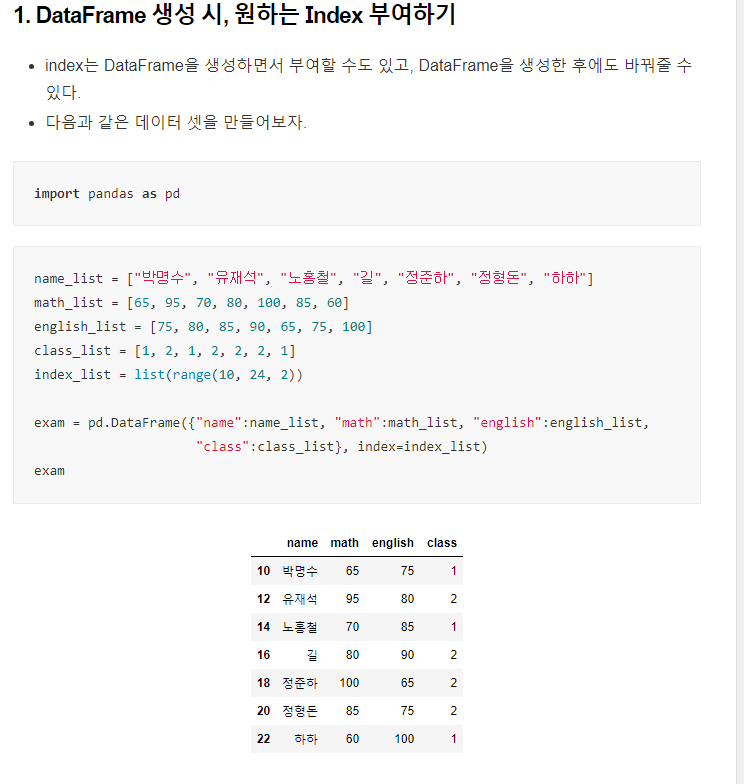

**카테고리, 사용시간, 흡입력 추출**

In [171]:
category_list=[]
use_time_list=[]
suction_list=[]

for spec_data in data['스펙 목록']:
  spec_list=spec_data.split('/')

  # 카테고리 추출하기
  category=spec_list[0]
  category_list.append(category)

**카테고리, 사용시간, 흡입력에 대한 전처리 결과 확인**

In [172]:
print('카테고리', len(category_list), category_list[0:5])

# 각자 가져온 데이터를 print()함수로 출력해본 결과, 300개로 오류 없이 잘 가져온 것으로 보입니다.
# 사용시간과 흡입력을 사용할수는 없습니다. 왜냐하면 숫자형 데이터가 아니기 때문입니다.

# '사용 시간' in spec 부분의 in 연산자는 spec 내용에 "사용시간"이라는 단어가 포함돼 있으면 True, 포함돼 있지 않으면 False를 반환합니다.

카테고리 280 ['유무선전화기', '무선전화기', '무선전화기', '유선전화기', '유무선전화기']


**6.3.5 무선청소기 사용시간 단위 통일시키기**

**사용시간을 분 단위로 조정하는 함수**

In [173]:
#def convert_time_minute(time):
#  try:
#    if '시간' in time:
#      hour=time.split('시간')[0]
#      if '분' in time:
#        minute=time.split('시간')[-1].split('분')[0]
#      else:
#        minute=0

#    else:
#      hour=0
#      minute=time.split('분')[0]
#    return int(hour)*60+int(minute)
# "시간" 단어가 있으면, "시간" 앞의 숫자를 추출한 뒤, 60을 곱해 사용시간에 더한다.
# "시간" 뒤의 글자에서 "분" 글자 앞의 숫자를 추출해서 사용시간에 더한다.
#  except:
#    return None

**사용시간을 분 단위로 조정하는 함수의 테스트**

In [174]:
#times=["40분","4분","1시간","3시간30분","4시간"]
#for time in times:
#  time_value=convert_time_minute(time)
# print(time, "=", time_value)

In [175]:
#new_use_time_list=[]
#for time in use_time_list:
#  value=convert_time_minute(time)
#  new_use_time_list.append(value)

**6.3.6 무선 청소기 흡입력 단위 통일시키기**

In [176]:
# 흡입력을 살펴보면 단위가 AW, W, PA 단위를 주로 사용한다는 것을 알 수 있습니다.

# 1 W = 1 AW = 100 PA, 각 단위 간의 정확한 환산은 어렵지만, 다음과 같이 볼 수 있습니다.
# 이 전환식을 활용해 AW를 기준으로 흡입력 단위를 통일하겠습니다.

**흡입력 단위를 통일시키는 함수**

In [177]:
#def get_suction(value):
#  try:
#    value=value.upper()
#    if "AW" in value or "W" in value: # 만약 흡입력에 "AW"나 "W"글자가 있다면
#      result=value.replace("A", " ").replace("W", " ") # 흡입력에서 "A"와 "W"글자를 삭
#      result=int(result.replace(",", " "))

#    elif "PA" in value:
#      result=value.replace("PA"," ")
#      result=int(result.replace)

#    else:
#      result=None

#    return result

#  except:
#    return None
# 흡입력 값이 비어 있거나 단위 변환 시 에러가 날 경우 예외로 처

In [178]:
#suction_list2=["100W","10AW","10,000Pa"]
#for power in suction_list2:
#  value=get_suction(power)
#  print(power, value)

In [179]:
a="100W"
a.replace("A","").replace("W","")

'100'

**흡입력 단위 통일 시키기**

In [180]:
#new_suction_list=[]
#for power in suction_list:
#  value=get_suction(power)
#  new_suction_list.append(value)

**다나와 전처리 결과를 엑셀로 저장**

In [181]:
# 전처리 과정을 통해 카테고리, 상품명, 사용시간, 흡입력 데이터가
# 저장된 각 리스트 변수들을 데이터프레임으로 변환해 head()함수로 확인

**전처리 데이터 확인**

In [182]:
pd_data=pd.DataFrame()
pd_data['카테고리']=category_list
pd_data['회사명']=company_list
pd_data['제품']=product_list

In [183]:
pd_data['가격']=data['가격']
#pd_data['흡입력']=new_suction_list
#pd_data['사용시간']=new_use_time_list

In [184]:
# 모델별 사용시간을 분 단위로 통일하기
new_use_time_list=[]
for time in use_time_list:
  value=convert_time_minute(time)
  new_use_time_list.append(value)
new_use_time_list[1:10]

[]

In [185]:
pd_data.head()

,카테고리,회사명,제품,가격
0,유무선전화기,모토로라,C7201A,"125,220원"
1,무선전화기,모토로라,IT.5.1XA,"69,000원"
2,무선전화기,모토로라,T401A,"48,970원"
3,유선전화기,맥슨전자,MS-911,"15,170원"
4,유무선전화기,모토로라,C7201M,"108,560원"


**카테고리 분류 기준 및 데이터 개수 점검**

In [186]:
pd_data['카테고리'].value_counts()
# 핸드/스틱 청소기부터 진공 청소기까지 총 8가지 종류의 청소기 카테고리가 있습니다.

카테고리
유선전화기      87
전화기액세서리    82
사무용전화기     65
무선전화기      30
유무선전화기     15
인테리어전화기     1
Name: count, dtype: int64

**핸디/스틱청소기만 선택**

In [187]:
pd_data_final=pd_data[pd_data['카테고리'].isin(['유선전화기'])]
len(pd_data_final)

87

**엑셀로 저장**

In [188]:
pd_data_final.to_excel('danawa_data_final.xlsx',index=False)

**데이터 살펴보기**

In [189]:
import pandas as pd
danawa_data=pd.read_excel('/content/danawa_data_final.xlsx')
danawa_data.head()

,카테고리,회사명,제품,가격
0,유선전화기,맥슨전자,MS-911,"15,170원"
1,유선전화기,대명전자통신,강력벨,"110,500원"
2,유선전화기,오빌,OP-201,"27,890원"
3,유선전화기,필립스,CORD026,NaN
4,유선전화기,한스,HP-210,"20,460원"


In [190]:
# pandas에서는 sort_values()라는 함수를 통해 특정 칼럼의 정렬 순서를 변경할 수 있습니다.
# top_list=danawa_data.sort)values(["흡입력"],ascending=False)

**평균값 정리**

In [191]:
# price_mean_value=danawa_data['가격'].mean()
# suction_mean_value=danawa_data['흡입력'].mea()
# use_time_mean_value=danawa_data['사용시간].mean()

**가성비 좋은 제품 탐색**

In [192]:
# condition_data=danawa_data[(danawa_data['가격']<=price_mean_value)&
#                           (danawa_data['흡입력']>=suction_mean_value)&
#                           (danawa_data['사용시간'>=use_time_mean_value),]
# condition_data

**데이터 시각화**

In [193]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns
import platform

In [194]:
font_path='' # 그프에서 한글 표기를 위한 글꼴 변경
if platform.system() == 'Darwin':
  rc('font', family='AppleGothic')

elif platform.system() == 'Windows':
  path='c:/Windows/Font/malgun.ttf'
  font_name=font_manager.FontProperties(fname=path).get_name()
  rc('font', family=font_name)

else:
  print('Unknow system.. sorrry!')
# 정확한 차트를 그리기 위해 가격, 사용시간, 흡입력 값이 없는 것은 삭제: dropna함수
# 데이터 행을 지워야 하기 때문에 옵션은 axis=0으로 설정.

Unknow system.. sorrry!


In [195]:
pd_data.head()

,카테고리,회사명,제품,가격
0,유무선전화기,모토로라,C7201A,"125,220원"
1,무선전화기,모토로라,IT.5.1XA,"69,000원"
2,무선전화기,모토로라,T401A,"48,970원"
3,유선전화기,맥슨전자,MS-911,"15,170원"
4,유무선전화기,모토로라,C7201M,"108,560원"


In [196]:
!apt-get install -y fonts-nanum*
!apt-get install fonts-nanum* -qq
!apt-get install -y fonts-nanum*
!rm -rf /root/.cache/matplotlib/* # 폰트 캐시 재설정
# 런타임 다시 시작 후 실행
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
#
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = mpl.font_manager.FontProperties(fname=path).get_name()
plt.rcParams['font.family'] = font_name

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20200506-1).
fonts-nanum-coding is already the newest version (2.5-3).
fonts-nanum-eco is already the newest version (1.000-7).
fonts-nanum-extra is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (

**가장 많이 있는 요소 찾기**

In [209]:
max_value=pd_data['카테고리'].value_counts().max()
max_value

87

In [210]:
pd_data['카테고리'].value_counts()

카테고리
유선전화기      87
전화기액세서리    82
사무용전화기     65
무선전화기      30
유무선전화기     15
인테리어전화기     1
Name: count, dtype: int64

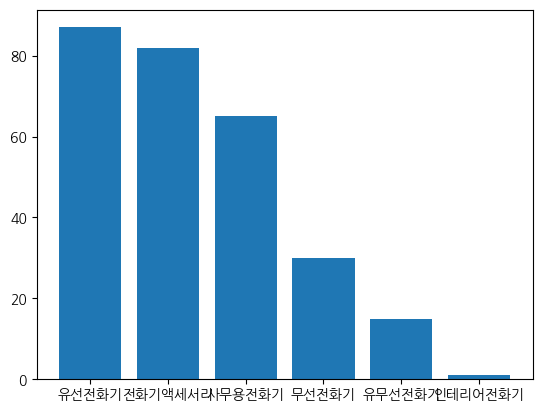

In [212]:
x0=['유선전화기','전화기액세서리','사무용전화기','무선전화기','유무선전화기','인테리어전화기']
x1=87
x2=82
x3=65
x4=30
x5=15
x6=1

y0=[x1,x2,x3,x4,x5,x6]

plt.bar(x0,y0)
plt.show()

In [198]:
category_counts = pd_data['카테고리'].value_counts()
max_category = category_counts.idxmax()
max_count = category_counts.max()

max_categories = category_counts[category_counts == max_count].index.tolist()
max_categories

['유선전화기']

In [199]:
%matplotlib inline

import matplotlib as mpl  # 기본 설정
import matplotlib.pyplot as plt  # 그래프 그리기
import matplotlib.font_manager as fm  # 폰트 관리


!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


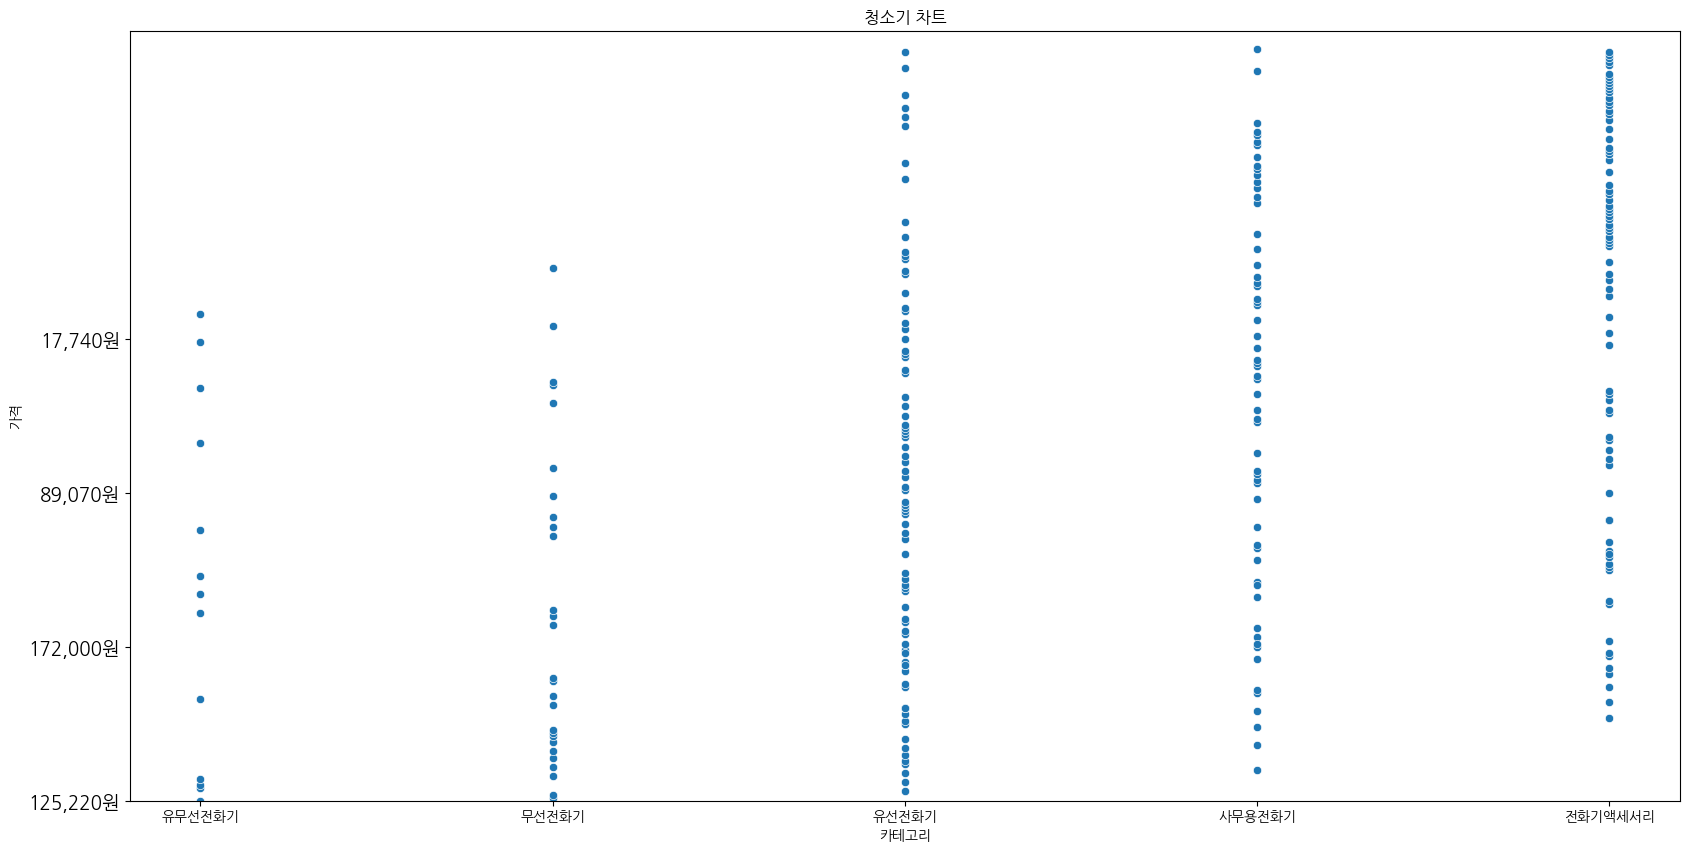

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
plt.title("청소기 차트")

sns.scatterplot(x='카테고리',y='가격',data=pd_data,sizes=(10,1000),legend=False)
# plt.plot([category_mean_value,category_max_value],'r---',lw=1)

plt.ylim([0, 250])     # Y축의 범위: [ymin, ymax]
plt.yticks(np.arange(0,200,50),fontsize=13.5)

plt.rc('font',family='NanumGothic')
plt.show()

**인기 제품의 데이터 시각화**

In [214]:
pd_data

,카테고리,회사명,제품,가격
0,유무선전화기,모토로라,C7201A,"125,220원"
1,무선전화기,모토로라,IT.5.1XA,"69,000원"
2,무선전화기,모토로라,T401A,"48,970원"
3,유선전화기,맥슨전자,MS-911,"15,170원"
4,유무선전화기,모토로라,C7201M,"108,560원"
...,...,...,...,...
275,전화기액세서리,삼성전자,AS-30S,NaN
276,전화기액세서리,코텍,전화엘코드,"17,500원"
277,전화기액세서리,LG전자,LGChem136191,"5,000원"
278,사무용전화기,LG전자,LIP-9024LSS,"96,790원"


In [215]:
pd_data['카테고리']

0       유무선전화기
1        무선전화기
2        무선전화기
3        유선전화기
4       유무선전화기
        ...   
275    전화기액세서리
276    전화기액세서리
277    전화기액세서리
278     사무용전화기
279      유선전화기
Name: 카테고리, Length: 280, dtype: object

In [217]:
category_max_value=pd_data['카테고리'].max()

<Axes: title={'center': '청소기'}, xlabel='카테고리', ylabel='가격'>

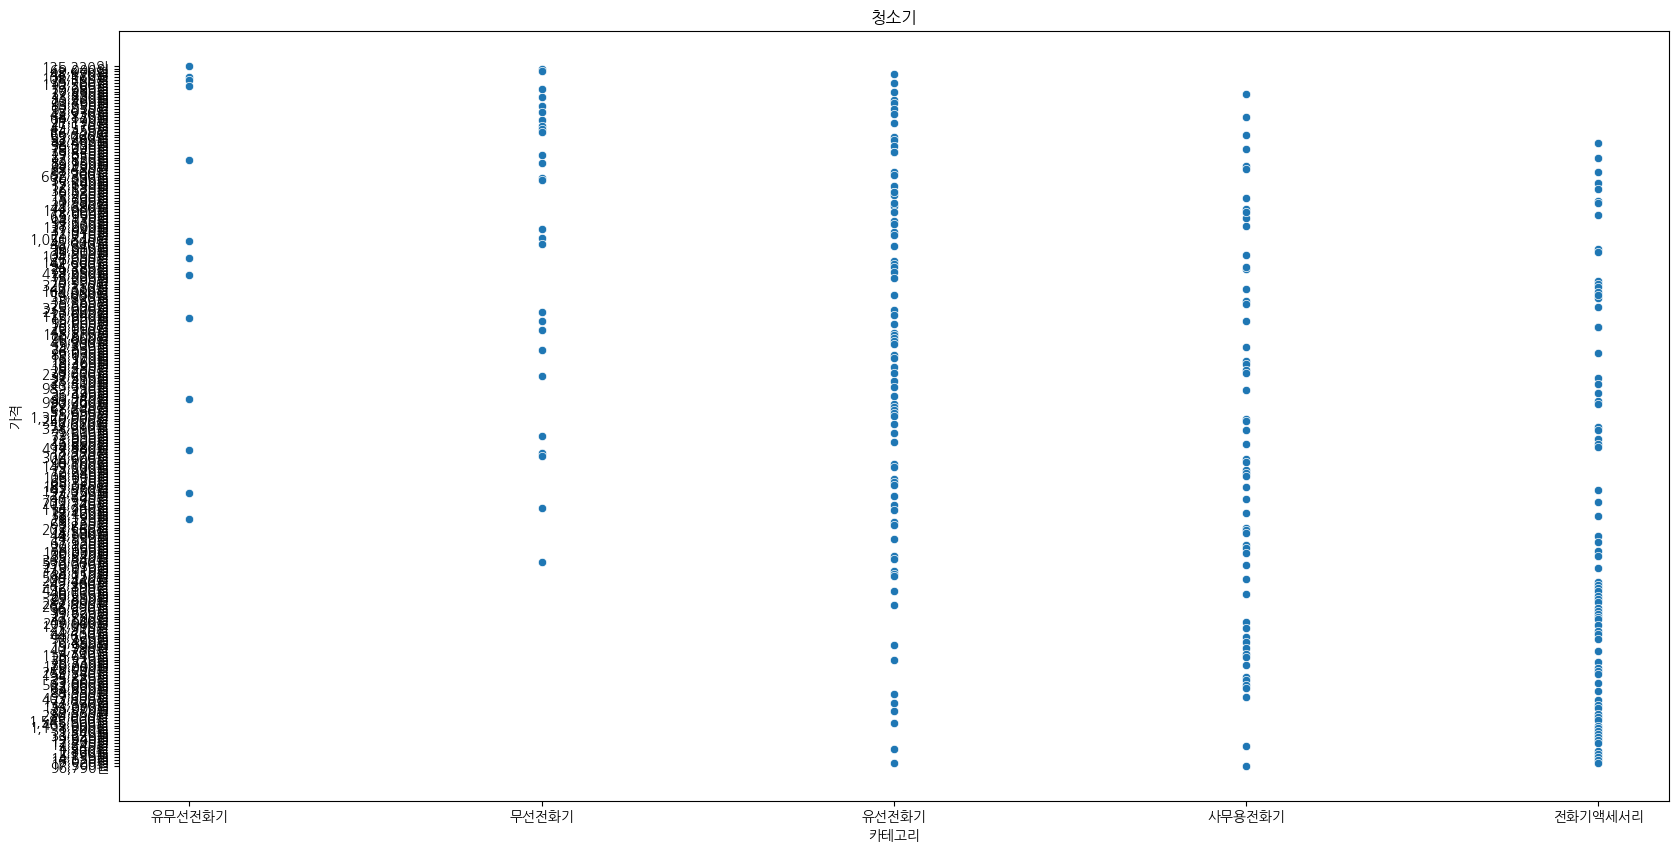

In [219]:
plt.figure(figsize=(20,10))
plt.title("청소기")
sns.scatterplot(x='카테고리',y='가격',data=pd_data,sizes=(10,1000),legend=False)


In [220]:
# 정리
# 다나와 사이트에서 무선 청소기 데이터를 크롤링을 통해 수집하고 분석에 활용했습니다.
# 특히 데이터 분석을 위해 수집된 데이터를 전처리하는 과정에서 정형화 돼 있지 않은 데이터 때문에 처리 과정이
# 다소 어렵고 의도치 않게 데이터가 유실되는 경우가 발생하기도 했습니다.

# 실제로 크롤링으로 수집되는 데이터는 대부분 비정형 데이터에 가깝기 때문에 전처리 과정을 최대한 세심하게 진행할 필요가
# 있고, 어떤 경우에는 파이썬 코드가 아닌 수작업으로 해결해야 하는 경우가 있습니다.

**그래프 한글 출력**

In [1]:
# 단계 1: 폰트 설치
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [2]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

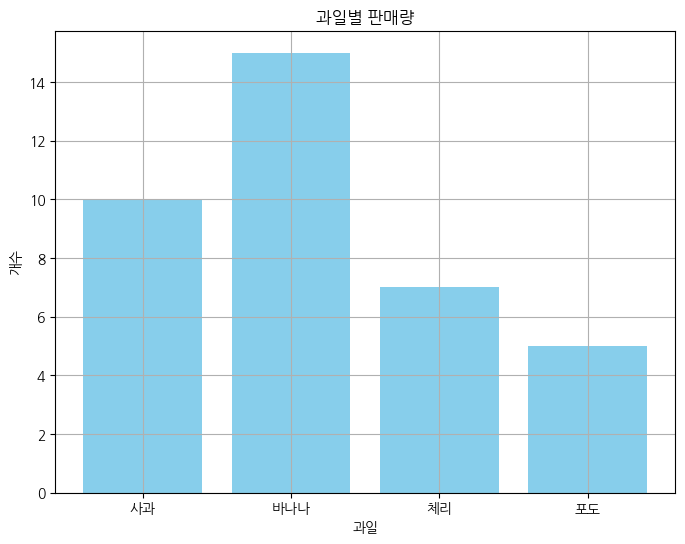

In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 2. matplotlib에서 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

# 3. 폰트 캐시 재설정 (필요한 경우)
import matplotlib
# matplotlib.font_manager._rebuild()

# 한글 테스트 데이터
categories = ['사과', '바나나', '체리', '포도']
values = [10, 15, 7, 5]

# 4. 그래프 그리기
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color='skyblue')
plt.title('과일별 판매량')
plt.xlabel('과일')
plt.ylabel('개수')
plt.grid(True)
plt.rc('font',family='NanumGothic')
plt.show()